In [2]:
import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Caricare il dataset scaricato dal link https://prosperitydata360.worldbank.org/en/dataset/WIPO+GIIWIPO_GII= pd.read_csv("C:/Users/Mauro Passari/Desktop/Boolean Master/Progetto Finale/WIPO-GII.csv", sep=';')
WIPO_GII

,Economy ISO3,Economy Name,Indicator,Attribute 1,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Aruba,Global Innovation Index: Institutions index,Rank,NaN,NaN,NaN,129,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Global Innovation Index: Institutions index,Score,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Global Innovation Index: Innovation linkages,Rank,NaN,NaN,NaN,122,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Global Innovation Index: Innovation linkages,Score,NaN,NaN,"16,7","16,7",NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Global Innovation Index: University-industry R...,Rank,NaN,NaN,NaN,124,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63811,ZWE,Zimbabwe,Global Innovation Index: Intensity of local co...,Rank,91,78,74,NaN,85,98,111,111,NaN,NaN
63812,ZWE,Zimbabwe,Global Innovation Index: Intensity of local co...,Score,"57,5","64,2","65,6",NaN,"63,6","61,4","58,4","58,4",NaN,NaN
63813,ZWE,Zimbabwe,Global Innovation Index: Domestic industry div...,Income Group(Strength/Weakness),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
63814,ZWE,Zimbabwe,Global Innovation Index: Domestic industry div...,Rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,106


In [4]:

filtered_data_pivot = pd.read_csv("C:/Users/Mauro Passari/Desktop/Boolean Master/Progetto Finale/Files definitivi per progetto finale/filtered_data_pivot.csv", sep=';')
filtered_data_pivot

,Country,Year,R&D,Acts involving the movement of dumping of waste,Acts that cause environmental pollution or degradation,Acts that result in the depletion of degradation of natural resources,Burglary,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,...,Fraud: Cyber-related (Cy),Money laundering,Smuggling of migrants,Theft,Theft: of a motorized vehicle,Trade or possession of protected or prohibited species of faune and flora,Unlawful access to a computer system,Unlawful interception or access of computer data,Unlawful interference with a computer system or computer data,Acts against public safety and state security
0,Italy,2014,"34,5","5140,0",NaN,NaN,NaN,"3700,0","488,0","3212,0",...,"23542,0","1604,0","1608,0","1121757,0","176461,0","174,0","9744,0","241,0","400,0","10385,0"
1,Italy,2015,"35,6","4203,0","16,0",NaN,"234726,0","3583,0","548,0","3035,0",...,"26378,0","2055,0","1560,0","1229103,0","165650,0","143,0","8317,0","225,0","356,0","8898,0"
2,Italy,2016,48,"3993,0","145,0","61,0","214053,0","21303,0","525,0","20778,0",...,"33080,0","1805,0","1604,0","1132814,0","156942,0","128,0","8836,0","286,0","428,0","9550,0"
3,Italy,2017,"46,5","4943,0","176,0","144,0","195824,0","3572,0","533,0","3039,0",...,"46078,0","1941,0","1365,0","1069965,0","145758,0","159,0","9002,0","152,0","276,0","9430,0"
4,Italy,2018,"45,2","6035,0","2227,0","128,0","191374,0","3367,0","408,0","2959,0",...,"60111,0","1959,0","1750,0","1001327,0","141132,0","215,0","11640,0","109,0","293,0","12042,0"
5,Italy,2019,"45,5","6450,0","2194,0","142,0","165329,0","3469,0","460,0","3009,0",...,"78543,0","2218,0","1935,0","906552,0","131148,0","313,0","14472,0","122,0","321,0","14915,0"
6,Italy,2020,"44,1","5628,0","1878,0","115,0","109503,0","3770,0","409,0","3361,0",...,"98617,0","2097,0","1293,0","612230,0","101042,0","327,0","17562,0","149,0","279,0","17990,0"
7,Italy,2021,"45,4","6273,0","2024,0","176,0","124715,0","3842,0","343,0","3499,0",...,"121498,0","1687,0","1377,0","702153,0","110171,0","280,0","19847,0","83,0","173,0","20103,0"
8,Italy,2022,"49,1",NaN,NaN,NaN,"133802,0","3671,0","355,0","3316,0",...,"101698,0","1561,0","1758,0","844951,0","125764,0",NaN,NaN,NaN,NaN,NaN


In [5]:
#Filtrare i dati relativi ai GII per l'Italia e per gli indici presi in considerazione
italy_data = WIPO_GII[
    (WIPO_GII["Economy Name"] == "Italy") & 
    (WIPO_GII["Indicator"].isin([
        "Global Innovation Index: University-industry R&D collaboration", 
        "Global Innovation Index: Research and development (R&D)", 
        "Global Innovation Index: ICT use", 
        "Global Innovation Index: ICT access"
    ]))
]
italy_data

,Economy ISO3,Economy Name,Indicator,Attribute 1,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
28153,ITA,Italy,Global Innovation Index: University-industry R...,Rank,64,57,57,57,43,42,41,40,38,27
28154,ITA,Italy,Global Innovation Index: University-industry R...,Score,"43,9","45,2","45,5","45,5","44,7","46,5","49,5",50,"51,2","58,2"
28404,ITA,Italy,Global Innovation Index: Research and developm...,Rank,29,29,29,23,21,23,22,23,22,22
28405,ITA,Italy,Global Innovation Index: Research and developm...,Score,"31,3","34,5","35,6",48,"46,5","45,2","45,5","44,1","45,4","49,1"
28421,ITA,Italy,Global Innovation Index: ICT access,Income Group(Strength/Weakness),NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
28422,ITA,Italy,Global Innovation Index: ICT access,Rank,29,30,33,32,33,42,48,49,44,60
28423,ITA,Italy,Global Innovation Index: ICT access,Score,"71,1","71,5","76,2","77,1","76,9","73,3","74,3","73,6","76,4","88,1"
28424,ITA,Italy,Global Innovation Index: ICT use,Rank,29,34,32,36,34,38,44,40,44,46
28425,ITA,Italy,Global Innovation Index: ICT use,Score,"47,5","48,9","53,8","57,4","62,5","63,5","65,3","70,4","71,6","73,4"


In [6]:
#trasporre gli anni da colonne a righe
years = [str(y) for y in range(2014, 2023)]
italy_long = italy_data.melt(id_vars=["Economy Name", "Indicator"], 
                             value_vars=["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"],
                             var_name="Year", 
                             value_name="Value")
italy_long

,Economy Name,Indicator,Year,Value
0,Italy,Global Innovation Index: University-industry R...,2014,57
1,Italy,Global Innovation Index: University-industry R...,2014,"45,2"
2,Italy,Global Innovation Index: Research and developm...,2014,29
3,Italy,Global Innovation Index: Research and developm...,2014,"34,5"
4,Italy,Global Innovation Index: ICT access,2014,NaN
...,...,...,...,...
76,Italy,Global Innovation Index: ICT access,2022,0
77,Italy,Global Innovation Index: ICT access,2022,60
78,Italy,Global Innovation Index: ICT access,2022,"88,1"
79,Italy,Global Innovation Index: ICT use,2022,46


In [ ]:
#Creare un nuovo dataset con i dati sui cyber-crimini e gli indici di sviluppo
cybercrimes_index = italy_long.pivot_table(index="Year", columns="Indicator", values="Value", aggfunc="first")

cybercrimes_index.reset_index(inplace=True)

cybercrimes_index.columns.name = None

cybercrimes_index.rename(columns={"Year": "Year"}, inplace=True)

cybercrimes_index['DESI']=['0', '42.4', '53.9', '43','53','47','68','63','0']
cybercrimes_index['R&D']=filtered_data_pivot['R&D'].str.replace(',', '.', regex=True).astype(float)
cybercrimes_index['Cybercrimes'] = (
    filtered_data_pivot['Acts against public safety and state security']
    .str.replace(',', '.', regex=True) 
    .astype(float) + 
    filtered_data_pivot['Fraud: Cyber-related (Cy)']
    .str.replace(',', '.', regex=True)
    .astype(float)
)

cybercrimes_index

,Year,Global Innovation Index: ICT access,Global Innovation Index: ICT use,Global Innovation Index: Research and development (R&D),Global Innovation Index: University-industry R&D collaboration,DESI,R&D,Cybercrimes
0,2014,30,34,29,57,0,34.5,33927.0
1,2015,33,32,29,57,42.4,35.6,35276.0
2,2016,32,36,23,57,53.9,48.0,42630.0
3,2017,33,34,21,43,43,46.5,55508.0
4,2018,0,38,23,42,53,45.2,72153.0
5,2019,0,44,22,41,47,45.5,93458.0
6,2020,0,40,23,40,68,44.1,116607.0
7,2021,44,44,22,38,63,45.4,141601.0
8,2022,0,46,22,27,0,49.1,NaN


In [30]:
col_to_consider = ['Global Innovation Index: ICT access', 'Global Innovation Index: ICT use', 'Global Innovation Index: Research and development (R&D)', 'DESI', 'R&D', 'Cybercrimes']


In [31]:
#Generare matrice di correlazione
df_to_matrix = cybercrimes_index[col_to_consider]
corr_matrix = df_to_matrix.corr()
corr_matrix

,Global Innovation Index: ICT access,Global Innovation Index: ICT use,Global Innovation Index: Research and development (R&D),DESI,R&D,Cybercrimes
Global Innovation Index: ICT access,1.000000,-0.482090,0.298387,0.064688,-0.325608,-0.215206
Global Innovation Index: ICT use,-0.482090,1.000000,-0.619822,0.014751,0.616778,0.884440
Global Innovation Index: Research and development (R&D),0.298387,-0.619822,1.000000,-0.381405,-0.946099,-0.589595
DESI,0.064688,0.014751,-0.381405,1.000000,0.274904,0.667532
R&D,-0.325608,0.616778,-0.946099,0.274904,1.000000,0.461565
Cybercrimes,-0.215206,0.884440,-0.589595,0.667532,0.461565,1.000000


In [57]:
#Eliminare i valori None
cybercrimes_index = cybercrimes_index.dropna(subset=['Cybercrimes'])

In [58]:
#Modello random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, n_estimators=50)
X = cybercrimes_index[col_to_consider]
y = cybercrimes_index['Cybercrimes']

model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 7794.53
MSE: 84570952.36
RMSE: 9196.25
R²: 0.90


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cybercrimes_index = cybercrimes_index.dropna()

X = cybercrimes_index[['DESI']]
y = cybercrimes_index['Cybercrimes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

MSE: 774208093.4277893
0.08516998229847317


In [60]:
cybercrimes_index.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Year                                                            8 non-null      object 
 1   Global Innovation Index: ICT access                             8 non-null      int32  
 2   Global Innovation Index: ICT use                                8 non-null      int32  
 3   Global Innovation Index: Research and development (R&D)         8 non-null      int32  
 4   Global Innovation Index: University-industry R&D collaboration  8 non-null      int32  
 5   DESI                                                            8 non-null      int32  
 6   R&D                                                             8 non-null      float64
 7   Cybercrimes                                                    

In [62]:
columns_to_convert = [
    'Global Innovation Index: ICT access',
    'Global Innovation Index: ICT use',
    'Global Innovation Index: Research and development (R&D)',
    'Global Innovation Index: University-industry R&D collaboration',
    'DESI'
]

for column in columns_to_convert:
    cybercrimes_index[column] = (
        cybercrimes_index[column]
        .astype(float)
    )

cybercrimes_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Year                                                            8 non-null      object 
 1   Global Innovation Index: ICT access                             8 non-null      float64
 2   Global Innovation Index: ICT use                                8 non-null      float64
 3   Global Innovation Index: Research and development (R&D)         8 non-null      float64
 4   Global Innovation Index: University-industry R&D collaboration  8 non-null      float64
 5   DESI                                                            8 non-null      float64
 6   R&D                                                             8 non-null      float64
 7   Cybercrimes                                                    

In [63]:
cybercrimes_index.head(10)

,Year,Global Innovation Index: ICT access,Global Innovation Index: ICT use,Global Innovation Index: Research and development (R&D),Global Innovation Index: University-industry R&D collaboration,DESI,R&D,Cybercrimes
0,2014,30.0,34.0,29.0,57.0,0.0,34.5,33927.0
1,2015,33.0,32.0,29.0,57.0,42.0,35.6,35276.0
2,2016,32.0,36.0,23.0,57.0,53.0,48.0,42630.0
3,2017,33.0,34.0,21.0,43.0,43.0,46.5,55508.0
4,2018,0.0,38.0,23.0,42.0,53.0,45.2,72153.0
5,2019,0.0,44.0,22.0,41.0,47.0,45.5,93458.0
6,2020,0.0,40.0,23.0,40.0,68.0,44.1,116607.0
7,2021,44.0,44.0,22.0,38.0,63.0,45.4,141601.0


In [64]:
columns_to_convert = [
    'Global Innovation Index: ICT access',
    'Global Innovation Index: ICT use',
    'Global Innovation Index: Research and development (R&D)',
    'Global Innovation Index: University-industry R&D collaboration',
    'DESI'
]

for column in columns_to_convert:
    cybercrimes_index[column] = (
        cybercrimes_index[column]
        .astype(int)
    )

In [65]:
#Regressione lineare semplice
import statsmodels.api as sm
Y = cybercrimes_index['Cybercrimes']
X = cybercrimes_index['DESI']
X = sm.add_constant(data=X)  
model = sm.OLS(endog=Y,exog=X)
results = model.fit()

In [66]:
results.summary()

c:\ProgramData\miniconda3\envs\boolean\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cybercrimes   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     5.053
Date:                Thu, 13 Feb 2025   Prob (F-statistic):             0.0656
Time:                        18:36:54   Log-Likelihood:                -93.146
No. Observations:                   8   AIC:                             190.3
Df Residuals:                       6   BIC:                             190.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.377e+04    2.9e+04      0.475      0.652   -5.72e+04    8.48e+04
DESI        1303.5207    579.907      2.248      0.066    -115.461    2722.502
==============================================================================
Omnibus:                        0.405   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.437
Skew:                           0.041   Prob(JB):                        0.804
Kurtosis:                       1.857   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

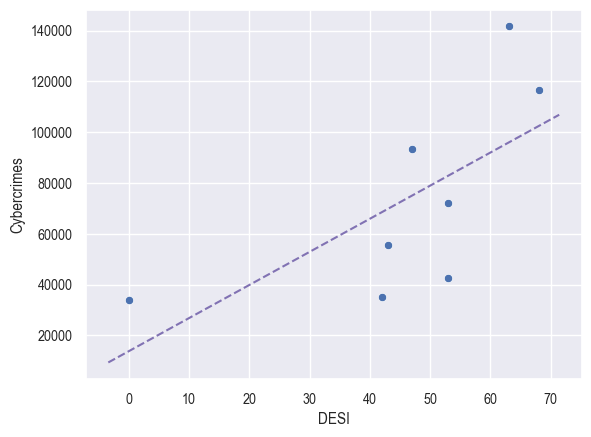

In [67]:

intercept = 1.377e+04	
slope= 1303.5207

sns.scatterplot(x='DESI', y='Cybercrimes', data=cybercrimes_index)

axes = plt.gca()  
x_vals = np.array(axes.get_xlim())  
y_vals = intercept + slope * x_vals   
plt.plot(x_vals, y_vals, '--', color='m')   
plt.show()

Il modello predittivo è stato scartato per i seguenti motivi:
1) numero troppo esiguo di records
2) conseguenzialmente gli errori relativi sono troppo elevati per considerare una previsione affidabile